# Introduction

The MS Estonia was a cruise ferry built in the 1980s in Papenburg,Germany. This ship disaster has been the biggest since the RMS Titanic. About 852 souls were lost. The disaster took place on 28th September, 1994 while the ship was crossing the Baltic Sea and enroute to Stockholm, Sweden.

The disaster was said to happen due to the failure of the bow visor at the front the ship due to extreme strains of the waves constantly hitting the forward most areas. This caused the front section to slowly tear off from the ship causing the front ramp and entry doors to open up leading the seawater gushing into the ship. Eventually, the MS Estonia capsized and sank. For all the mechanical engineers and material/metallurgy engineers, this particular youtube video will be an interesting watch showing a simulation of what happened that particular night.


Youtube simulation link

https://www.youtube.com/watch?v=IyqlkWZL0ZI


Through this particular notebook, we will try to understand what are the various factors that led to passneger deaths. We will check if there are any factors that helped a passenger to survive the disaster.

At the same time, we must all pay respects to the families of the all passengers who couldn't make it through the rough night.

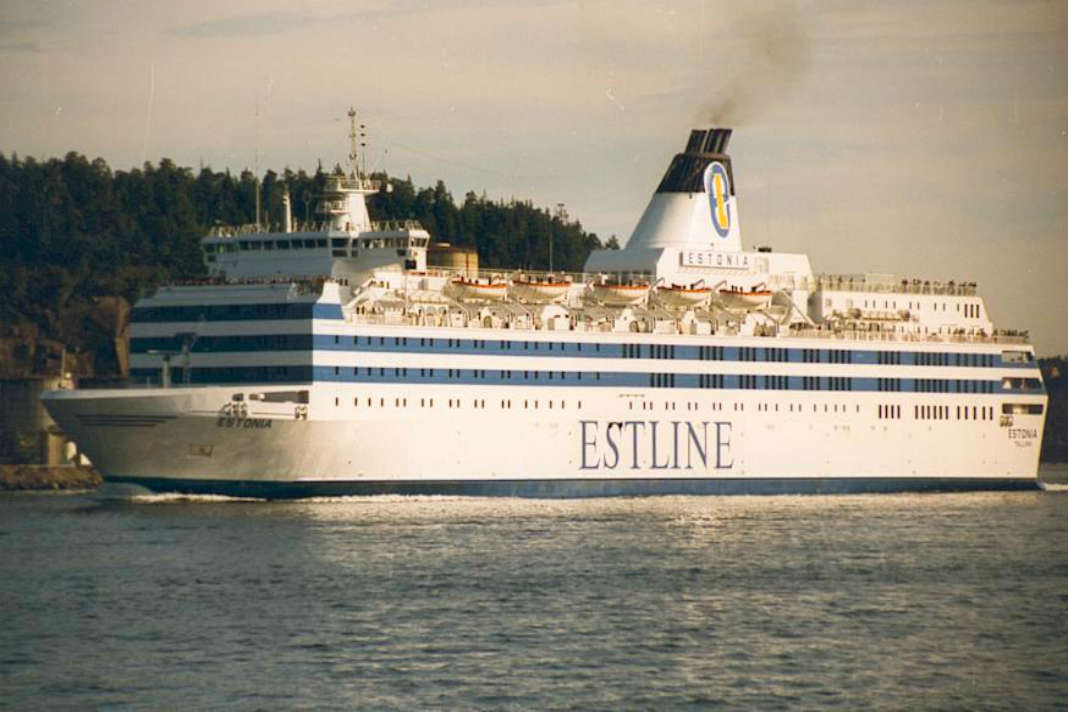


# Importing libraries and datasets

Let us import all the relevant libraries and datasets


In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots


In [ ]:
df=pd.read_csv('../input/passenger-list-for-the-estonia-ferry-disaster/estonia-passenger-list.csv')
df.head()

# Data Wrangling

Let us first analyse what the data entries exactly mean. We shall try to take care of null values if any and then use some feature engineering to make the data more understandable for the algorithm. 

In [ ]:
df.isna().any()

As we can see, there are no null values associated with any of the columns.

Let us try to see how the data has been encoded.

### Sex

M: Male

F:Female

### Category

C: Crew member

P: Passenger

### Survived

0: Could not survive

1: Survived

We also know that things like PassengerId and First,last name will not help our predictions in any manner. Let us simply drop these particular columns.

In [ ]:
unn_cols=['PassengerId','Firstname','Lastname']

for cols in unn_cols:
    df.drop(cols,axis=1,inplace=True)

In [ ]:
df.head()

# Data Visualisation


## Country of origin

Let us try to visualise the data to understand how to better feature engineer our dataframe. Let us start off with passenger country of origin.



In [ ]:
df_temp=df.copy()
df_temp['Count']=1
df_country=df_temp.groupby('Country')['Count'].sum().reset_index().sort_values(by='Count',ascending=False)

fig1=go.Figure([go.Pie(labels=df_temp['Country'],values=df_temp['Count'])])

fig1.update_traces(textfont_size=15,textinfo='value+percent')
fig1.update_layout(title='Passenger nationalities',title_x=0.5,height=700,width=700)
fig1.show()

As we can see from the plot above, most of the passnegers were from Sweden or Estonia. The other nationalities were Latvia, Finland, Russia and a few more.


## Sex

Let us check the sexes of the passengers and their correlation with survival.


In [ ]:
df_temp['Survived']=df_temp['Survived'].replace(0,'Not survived')
df_temp['Survived']=df_temp['Survived'].replace(1,'Survived')

sns.catplot('Sex',kind='count',hue='Survived',data=df_temp,height=8,aspect=2,palette='winter')
plt.xticks(size=15)
plt.xlabel('Sex',size=15)
plt.ylabel('Number of passengers',size=15)
plt.title('Survival of passengers based on sex',size=25)

In [ ]:
df_male=df_temp[df_temp['Sex']=='M']
df_female=df_temp[df_temp['Sex']=='F']

colors=['green','orange']
df_survival=df_temp.groupby('Survived')['Count'].sum().reset_index().sort_values(by='Count')
fig2=go.Figure([go.Pie(labels=df_survival['Survived'],values=df_survival['Count'])])

fig2.update_traces(textfont_size=15,textinfo='value+percent+label',marker=dict(colors=colors))
fig2.update_layout(title='\n  \n Male fatality rate: {0:.2f} % \n Female fatality rate: {1:.2f} %'.format(100*df_male['Survived'].value_counts()[0]/ df_male.shape[0],100*df_female['Survived'].value_counts()[0]/ df_female.shape[0]),title_x=0.5,height=700,width=700)
fig2.show()

From the above plots, we see that the fatality rate for females were higher than that of male passengers. This is quite opposite to what was observed for the Titanic where male fatality rates were higher.

In total, 86.1% passengers could sadly not make it alive from the disaster.

## Age

Let us see how the ages of the passengers are distributed first.

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(df_temp['Age'])
plt.title('Passenger age distribution',size=20)
plt.axvline(df_temp['Age'].median(),color='red',label='Median age')
plt.legend()

From the above distplot, we see that most of the passengers were of the ages between 40-60.

Let us see if there is any relation between age and survival using a regplot.

In [ ]:
fig3=plt.figure(figsize=(10,8))
ax1=fig3.add_subplot(111)
plt.title('Surival with respect to age',size=20)

sns.regplot(df['Age'],df['Survived'],ax=ax1)
ax1.set_xlabel('Age',size=15)
ax1.set_ylabel('Survived',size=15)

As we can see from the above regplot, as the passenger age increases, survival rate also reduces. This means older people were less likely to survive the disaster.


## Category of passenger

Let us see if category of the passenger had any relation to survival of passengers. C stood for crew members while P stood for passengers.

In [ ]:
df_temp['Category']=df_temp['Category'].replace('C','Crew member')
df_temp['Category']=df_temp['Category'].replace('P','Passenger')

In [ ]:
df_cats=df_temp.groupby('Category')['Count'].sum().reset_index()

fig3=go.Figure([go.Pie(labels=df_cats['Category'],values=df_cats['Count'])])

fig3.update_traces(textfont_size=15,textinfo='value+percent')
fig3.update_layout(title='Passenger categories',title_x=0.5,height=700,width=700)
fig3.show()

In [ ]:
df_crew=df_temp[df_temp['Category']=='Crew member']
df_pass=df_temp[df_temp['Category']=='Passenger']
sns.catplot('Category',kind='count',data=df_temp,hue='Survived',palette='viridis',aspect=2,height=8)
plt.xticks(size=15)
plt.xlabel('Category',size=15)
plt.ylabel('Number of passengers',size=15)
plt.title('Category wise fatalities \n \n Crew fatality rate:{0:.2f}% \n \n Passenger fatality rate:{1:.2f}%'.format(100*df_crew['Survived'].value_counts()[0]/df_crew.shape[0],
                                                                                                                     100*df_pass['Survived'].value_counts()[0]/df_pass['Survived'].shape[0]),size=20)

From the above plot, we see that the fatality rate for the crew members was slightly lower than passengers. This is opposite to what happened in the RMS titanic where the crew fatality rate was higher than passenger fatality rate. 

# Feature engineering

Now that we are done with the data visualisation process, let us do some feature engineering which will benefit us to feed the data into the ML algorithm.


First, let us categorize the continuous age values into age bands as follows:


0-10 : 1

11-20 : 2

20-40 : 3

40-60 : 4

60 and above :5

In [ ]:
df.loc[df['Age']<=10,'Age band']=1
df.loc[(df['Age']>10) & (df['Age']<21),'Age band']=2
df.loc[(df['Age']>20) & (df['Age']<41),'Age band']=3
df.loc[(df['Age']>40) & (df['Age']<61),'Age band']=4
df.loc[(df['Age']>60),'Age band']=5

In [ ]:
df.drop('Age',axis=1,inplace=True)

In [ ]:
temp=pd.get_dummies(df['Category'])
df=df.merge(temp,on=df.index)

In [ ]:
temp_sex=pd.get_dummies(df['Sex'])

In [ ]:
df.drop('key_0',axis=1,inplace=True)
df=df.merge(temp_sex,on=df.index)

As per my intuition, the country of origin should really have no importance in predicting the survival of the passengers. Hence, we shall drop this feature alongwith the rest of the unimportant features.

In [ ]:
df.drop(['key_0','Country','Sex','Category'],axis=1,inplace=True)
df.head()

Our dataframe is now ready for Machine Learning algorithm. All we have to do now is to segregate the target columns.

In [ ]:
target=df['Survived']
df.drop('Survived',axis=1,inplace=True)

# Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df
y=target
X_train,X_test,y_train,y_test=train_test_split(X,y,shuffle=True,test_size=0.2,random_state=0)

## A) Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
reg_log=LogisticRegression()
reg_log.fit(X_train,y_train)

In [ ]:
y_pred=reg_log.predict(X_test)

In [ ]:
reg_log.score(X_train,y_train)

In [ ]:
from sklearn.metrics import confusion_matrix
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111)
conf_mat_log=confusion_matrix(y_pred,y_test)
sns.heatmap(conf_mat_log,annot=True,fmt='g',ax=ax)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.xaxis.set_ticklabels(['Not survived', 'Survived'])
ax.yaxis.set_ticklabels(['Not survived', 'Survived'],rotation=0)

## B) Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier(max_depth=4)
dtc.fit(X_train,y_train)
y_pred_dtc=dtc.predict(X_test)

In [ ]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111)
conf_mat_dtc=confusion_matrix(y_pred_dtc,y_test)
sns.heatmap(conf_mat_dtc,annot=True,fmt='g',ax=ax,cmap='gnuplot')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.xaxis.set_ticklabels(['Not survived', 'Survived'])
ax.yaxis.set_ticklabels(['Not survived', 'Survived'],rotation=0)

## C) XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
xgb.score(X_train,y_train)

In [ ]:
y_pred_xgb=xgb.predict(X_test)
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111)
conf_mat_xgb=confusion_matrix(y_pred_xgb,y_test)
sns.heatmap(conf_mat_xgb,annot=True,fmt='g',ax=ax,cmap='summer')
ax.set_ylabel('Predicted')
ax.set_xlabel('Actual')
ax.xaxis.set_ticklabels(['Not survived', 'Survived'])
ax.yaxis.set_ticklabels(['Not survived', 'Survived'],rotation=0)

## D) LightGBM Classifier

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
lgb=LGBMClassifier()
lgb.fit(X_train,y_train)

In [ ]:

fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111)
y_pred_lgb=lgb.predict(X_test)
conf_mat_lgb=confusion_matrix(y_pred_lgb,y_test)
sns.heatmap(conf_mat_lgb,annot=True,fmt='g',ax=ax,cmap='coolwarm')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.xaxis.set_ticklabels(['Not survived', 'Survived'])
ax.yaxis.set_ticklabels(['Not survived', 'Survived'],rotation=0)

# Conclusion

* Fatality rate for the disaster was quite high with about 86% people losing their lives.
* Fatality rate for crew members was slightly better than the passengers.
* With age, the chances of survival reduced.
* Female fatality rate was notable higher than male fatality.
* Due to imabalance in the dataset, number of predictions for survivors could not be captured by the algorithms due to very low survivor data.

# If you found the notebook helpful, an upvote would be great ! :)